## Tutorial 7: Genetic Programming

The aim is to maximize the equation:
    
    y = w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w6*x6
    
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    
    What are the best values for the 6 weights w1 to w6?
    
    We are going to use the genetic algorithm for the best possible values after a number of generations.

In [9]:
def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the member
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover


In [10]:
import numpy

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
    
"""
sol_per_pop = 32
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) 
print(pop_size)
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)



(32, 6)
[[-0.56664081 -1.75237673  0.79773537  2.71351055  1.0925517  -1.67582905]
 [-3.58996473 -0.72566582 -2.7379849  -0.94028715 -2.7467946   2.59053419]
 [ 3.52188967  3.41955869 -0.79526829  1.92437823  0.45407087  1.5764173 ]
 [ 2.55689476  0.07073062 -1.26550297 -3.28926103  3.71020669  2.77482653]
 [ 3.67880353 -3.85858335  3.31970275 -3.54178259 -0.74272836 -1.07331162]
 [-0.04875657  3.28077902 -0.58632486  3.66681177 -0.84445458 -3.35902596]
 [ 2.66486761  2.03309126  2.94850445  2.39898495  1.7666665   2.51883693]
 [ 3.03769317  1.76679217  2.68658144 -2.83773704 -3.06676244  3.15435022]
 [-0.75358386  1.75998538  3.53009188  2.27383931  1.68471926 -2.00251245]
 [ 1.81086468 -3.752526   -1.61885556  0.68304824 -1.48080928 -1.03440664]
 [-3.75668768  0.93877208 -2.72909769 -3.6146472   0.86034674  1.12327626]
 [ 1.63124695  1.24352399 -2.67137506  2.43874288 -2.03311351 -0.84619143]
 [-0.38117373  0.42482011  3.74919592 -1.61130446  3.64737093 -1.99020796]
 [ 3.86039269 -2.

Generation :  0
Fitness
[131.22062244 131.17113603 128.7287198  127.80362115 135.65455827
 128.07814945 130.36012426 126.72028596 135.94532049 134.39712492
 129.65425256 131.35416219 127.93321628 127.6011352  133.31812889
 123.55118975 123.34151648 135.53722435 122.23416628 125.22213871
 128.83961617 133.55881215 124.92330572 127.9595661  132.62234096
 133.16024649 123.03299744 130.02095136 130.13005236 129.65807153
 127.49831134 130.22108545]
Best result :  135.94532048646226
Parents
[[ 3.16349676 -0.46232628  6.43613195  3.72955993 -3.3488843  -9.43716855]
 [ 3.16349676 -0.46232628  6.45251714  3.72955993 -3.3488843  -9.36310251]
 [ 3.16349676 -0.46232628  6.83184737  3.72955993 -3.3488843  -9.05565788]
 [ 3.16349676 -0.46232628  6.88458605  3.72955993 -3.3488843  -8.77381005]]
Crossover
[[ 3.16349676 -0.46232628  6.43613195  3.72955993 -3.3488843  -9.36310251]
 [ 3.16349676 -0.46232628  6.45251714  3.72955993 -3.3488843  -9.05565788]
 [ 3.16349676 -0.46232628  6.83184737  3.72955993

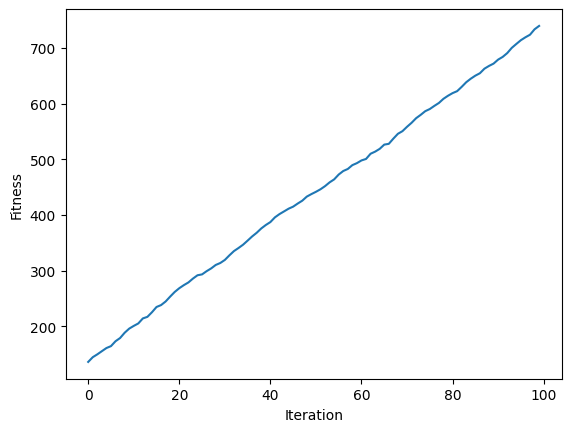

In [12]:
best_outputs = []
num_generations = 100
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each member in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()